In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import glob
import os
import math
from os import listdir
import data_visualization as dv
import dill
import scipy 
from scipy.stats import norm
from scipy import stats
import random
import sys
import importlib
'''
This make figs script uses the objects instead of pickling and calculating like v1
'''

'\nThis make figs script uses the objects instead of pickling and calculating like v1\n'

In [2]:
sys.path.insert(0,r'D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement')
import plot_functions 
import Subject_Object
importlib.reload(Subject_Object)
importlib.reload(plot_functions)
import plot_functions as pf

## Initial Thangs

In [3]:
experiment = 'Exp2'

In [4]:
plt.style.use('cashaback_dark')
wheel = dv.ColorWheel()

# Initial thangs
os.chdir(f'D:\OneDrive - University of Delaware - o365\Subject_Data\MatchPennies_Agent_{experiment}')
PATH = os.getcwd()
SAVE_PATH = f'C:\\Users\\Seth Sullivan\\OneDrive - University of Delaware - o365\\Desktop\\MatchPennies-Agent-Expirement\\Group_Figures\\{experiment}\\'
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

# Fields pull and pull list
figures_pull_list = []
figures_pull_list_control = []
figures_pull_list_task = []
fields_pull = []
with open(PATH+"\\Figures_Pull_List.txt", "r") as pull_file:
    figures_pull_list = pull_file.read().splitlines()
with open(PATH+"\\Fields_Pull.txt", "r") as fields_pull:
    fields_pull = fields_pull.read().splitlines()
num_subjects = len(figures_pull_list)

if experiment == 'Exp1':
    tp3_title = "1000 (50)"
    tp4_title = "1000 (150)"
    tp5_title = '1100 (50)'
    tp6_title = "1100 (150)"
    tp7_title = "1200 (50)"
    tp8_title = '1200 (150)'
    trial_block_titles = [tp3_title, tp4_title, tp5_title,tp6_title, tp7_title, tp8_title]
    num_blocks = len(trial_block_titles)
    num_rows,num_cols = 2,3
    
if experiment == 'Exp2':
    tp3_title = "Win = 1\nIncorrect = 0\nIndecision = 0"
    tp4_title = "Win = 1\nIncorrect = -1\nIndecision = 0"
    tp5_title = "Win = 1\nIncorrect = 0\nIndecision = -1"
    tp6_title = "Win = 1\nIncorrect = -1\nIndecision = -1"
    trial_block_titles = [tp3_title, tp4_title, tp5_title,tp6_title]
    num_blocks = len(trial_block_titles)
    num_rows,num_cols = 2,2
    
num_subjects

5

## Pickle Objects

In [5]:
NUM_STDS = 0
append_dict = {0:'reaction_time_no_sd_off',1:'reaction_time_minus_sd',2:'reaction_time_minus_2sd'}
load_path = r'Subjects_Analyzed'
group = dill.load((open(load_path + f'\\group_object_{append_dict[NUM_STDS]}.pkl', 'rb')))
group.analyze_data()

D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Subject_Object.py:393: RuntimeWarning: Mean of empty slice
  self.binned_player_task_leave_times_mean            = np.nanmean(self.binned_player_task_leave_times,axis=2) # Mean for each bin, each condition
D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Subject_Object.py:394: RuntimeWarning: Mean of empty slice
  self.binned_player_minus_agent_task_leave_time_mean = np.nanmean(self.binned_player_minus_agent_task_leave_time,axis=2)


## Set Save to True or False

In [6]:
save = False

Reaction Time Distributions (Group)

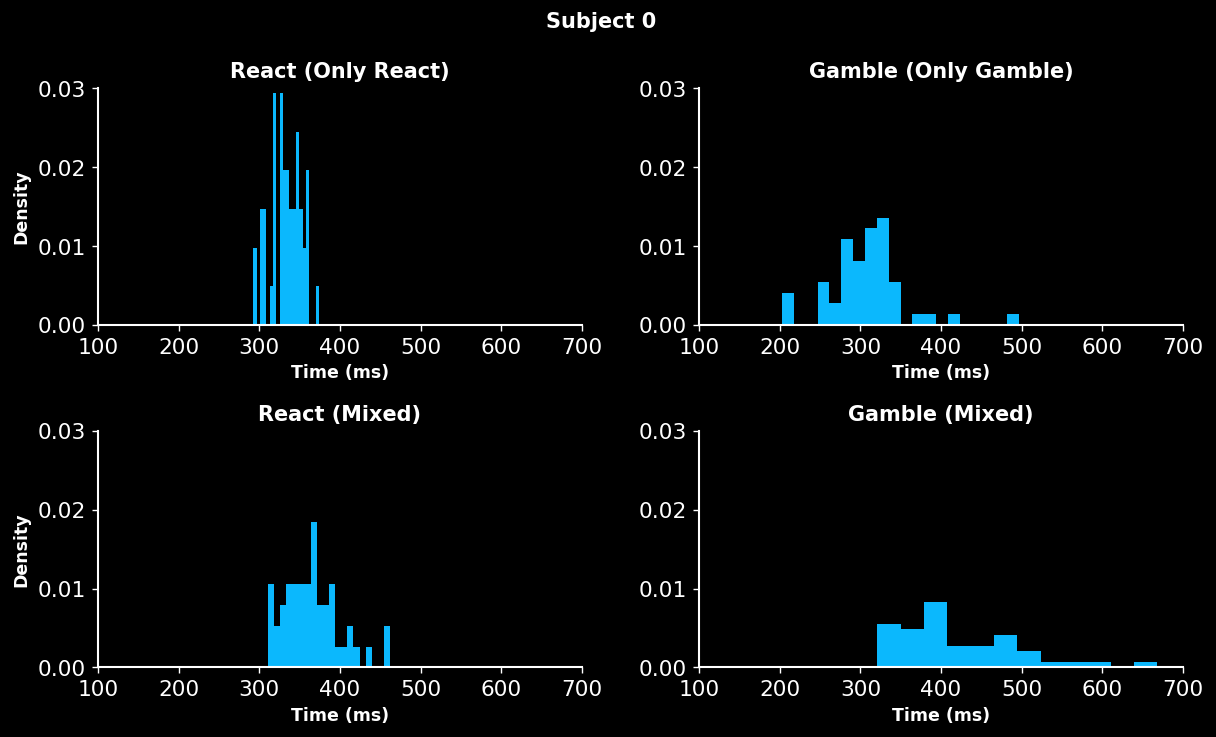

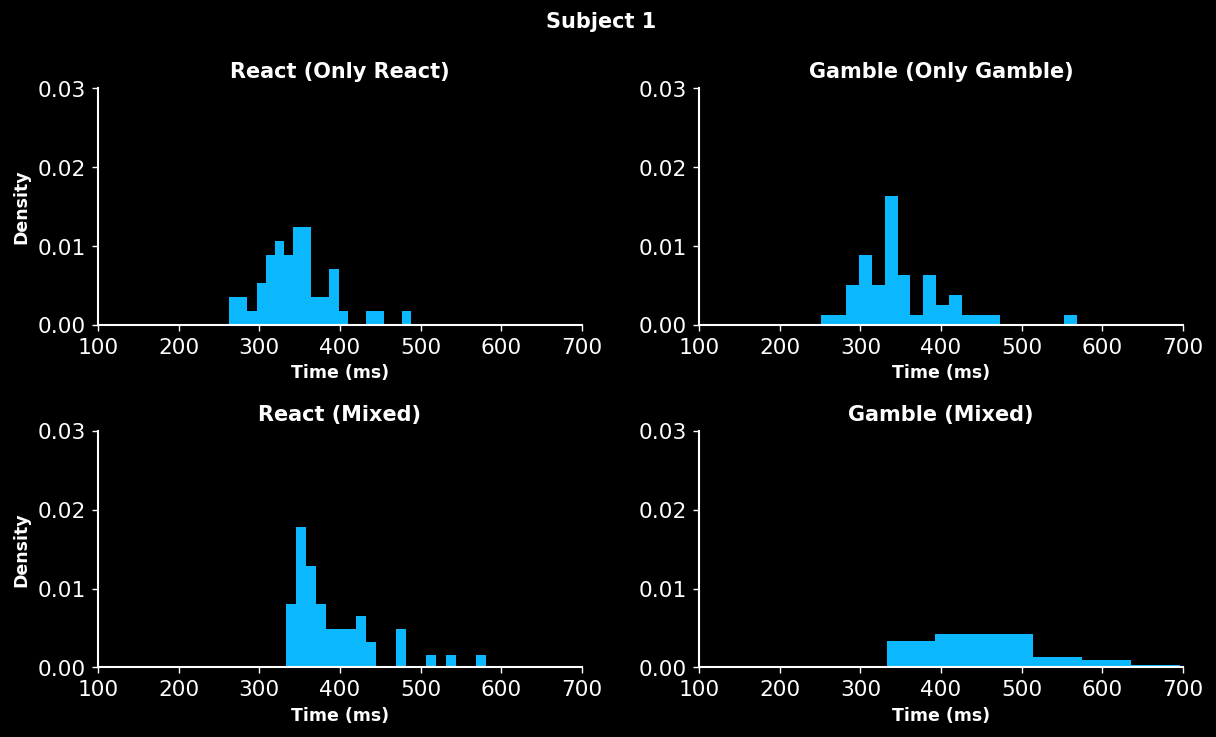

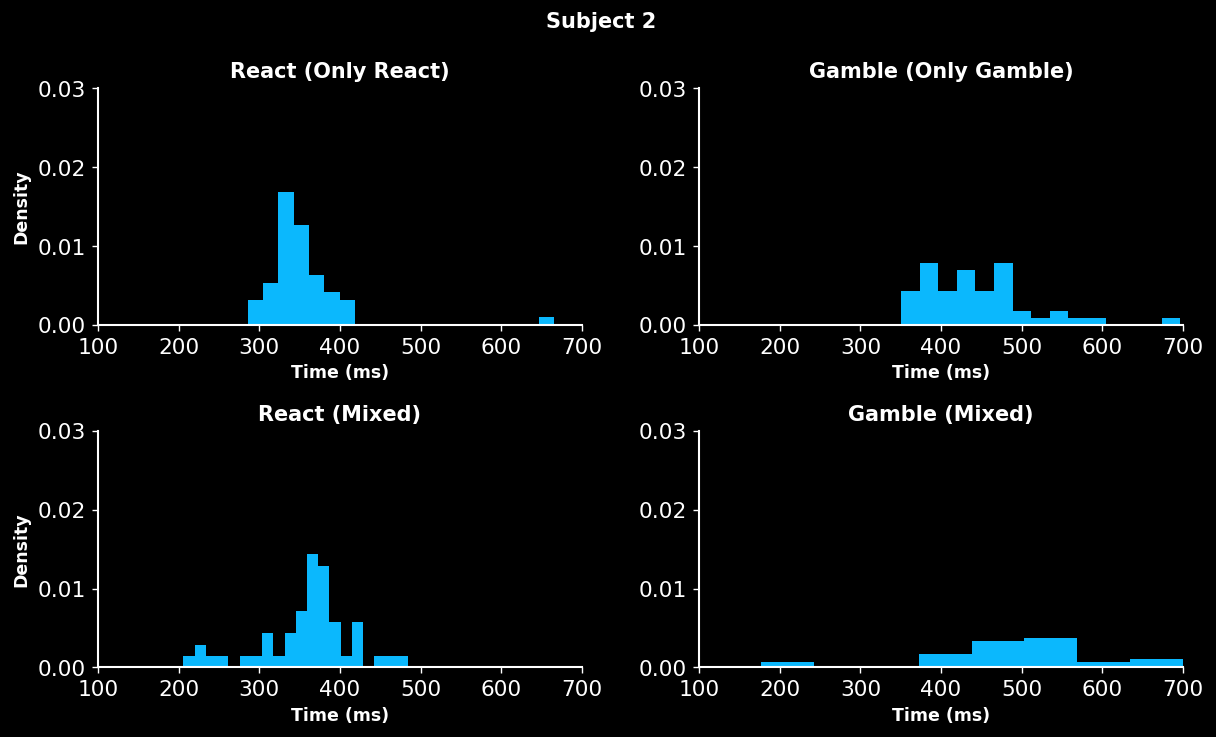

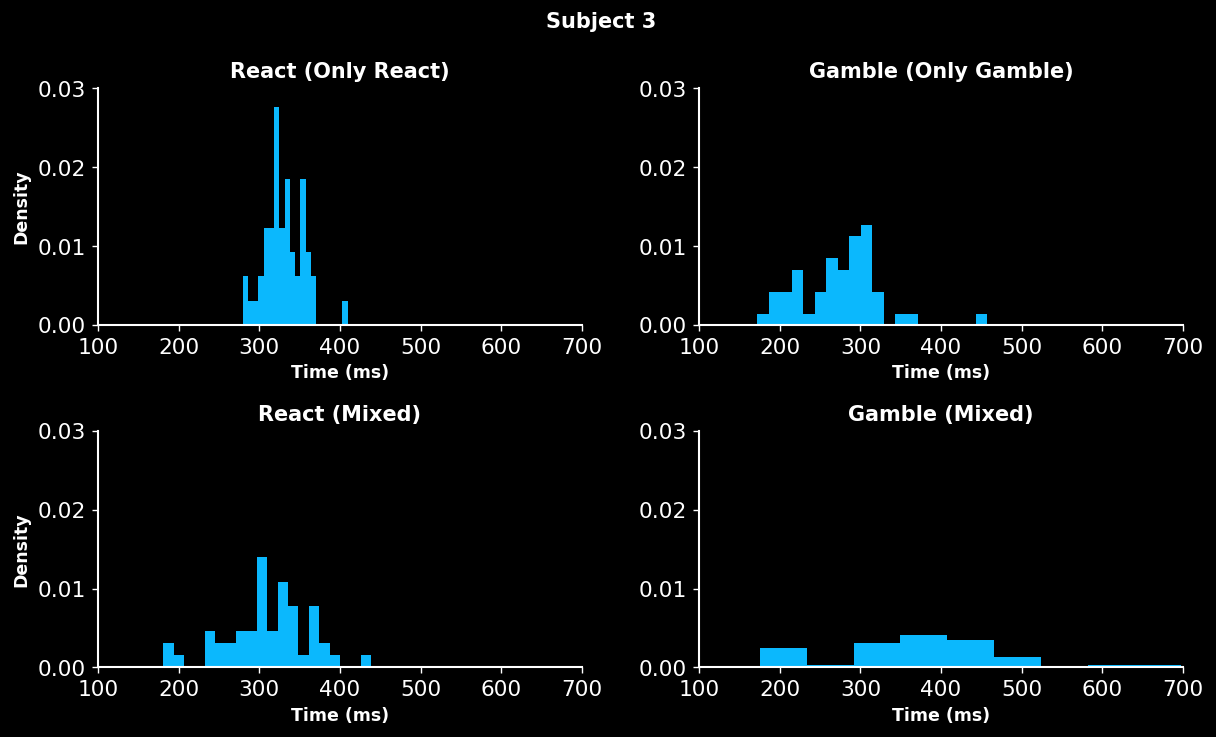

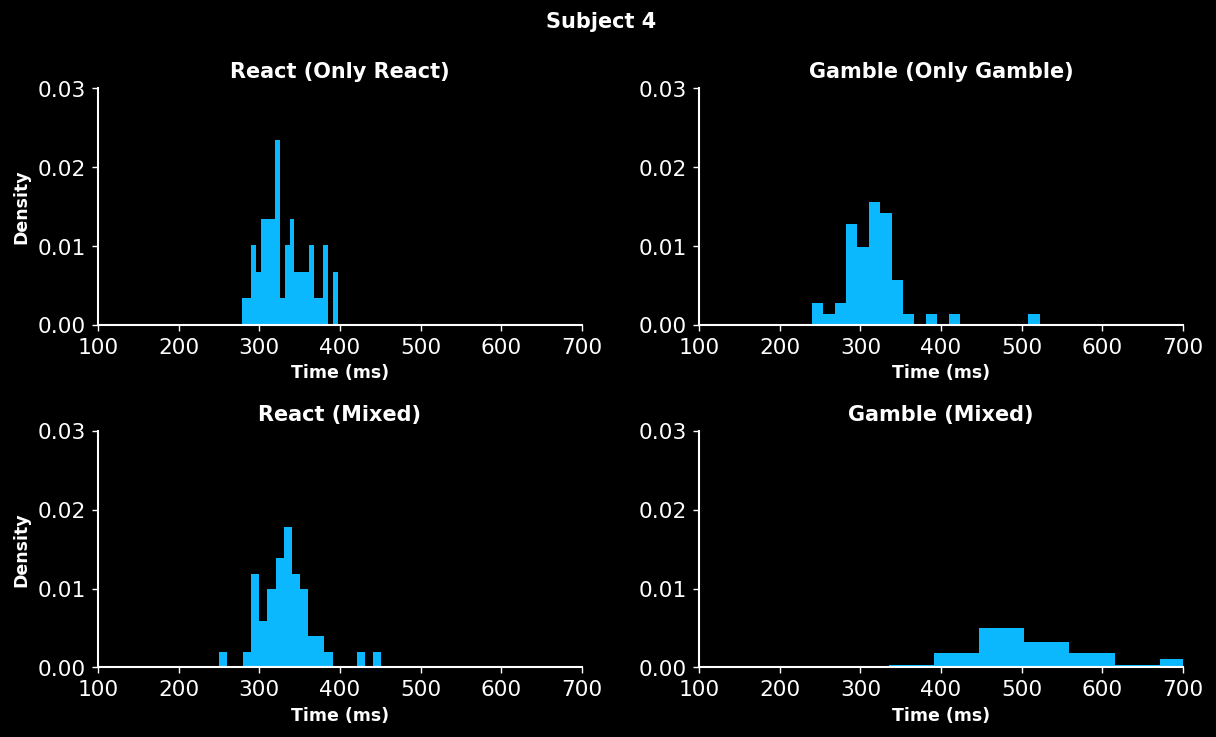

In [7]:
titles = ['React (Only React)', 'Gamble (Only Gamble)','React (Mixed)','Gamble (Mixed)']
for i in range(num_subjects):
    fig,axs = plt.subplots(2,2,figsize = (10,6))
    reaction_time_list = [group.react_reaction_time_only_react[i,:],group.gamble_reaction_time_only_gamble[i,:],
                          group.react_reaction_time_mixed[i,:],group.gamble_reaction_time_mixed[i,:]]

    for j,ax in enumerate(axs.flatten()):
        ax.hist(reaction_time_list[j] ,bins=20,density=True)
        ax.set_title(titles[j],fontsize = 12)
        ax.set_xlabel('Time (ms)',fontsize = 10)
        ax.set_xlim(100,700)
        ax.set_ylim(0,0.03)
        
    axs[0,0].set_ylabel('Density',fontsize = 10)
    axs[1,0].set_ylabel('Density',fontsize = 10)
    plt.suptitle(f'Subject {i}',fontsize = 12)
    plt.tight_layout()
    plt.show()

In [8]:
group.player_task_leave_time[i,:].shape

(4, 40)

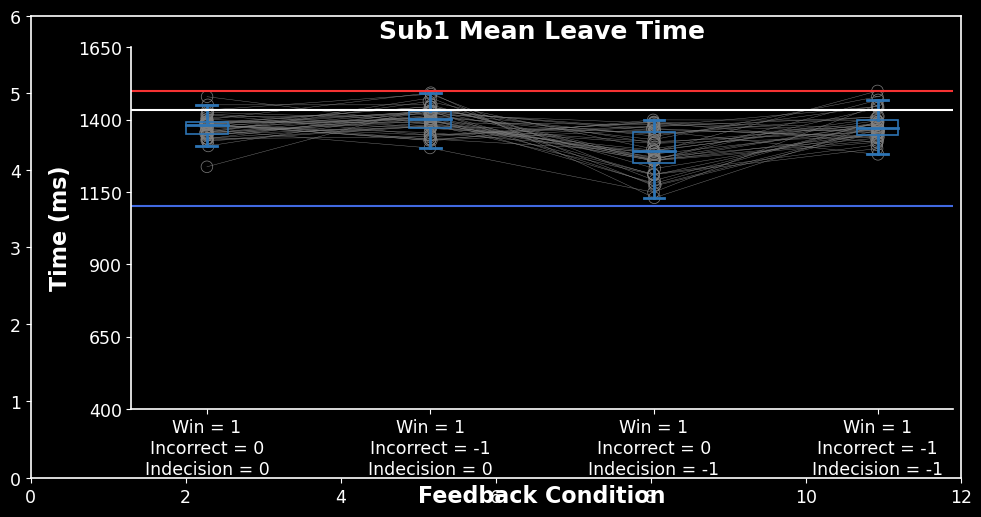

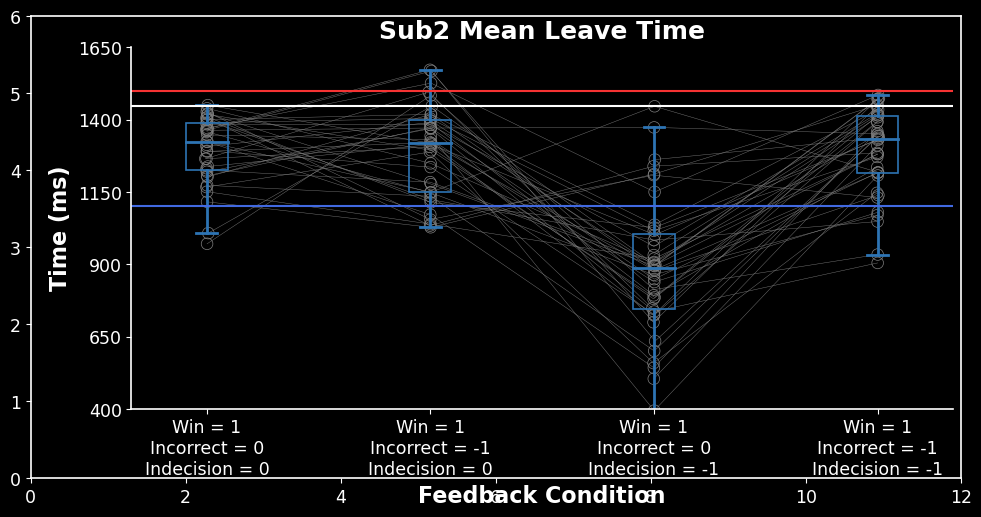

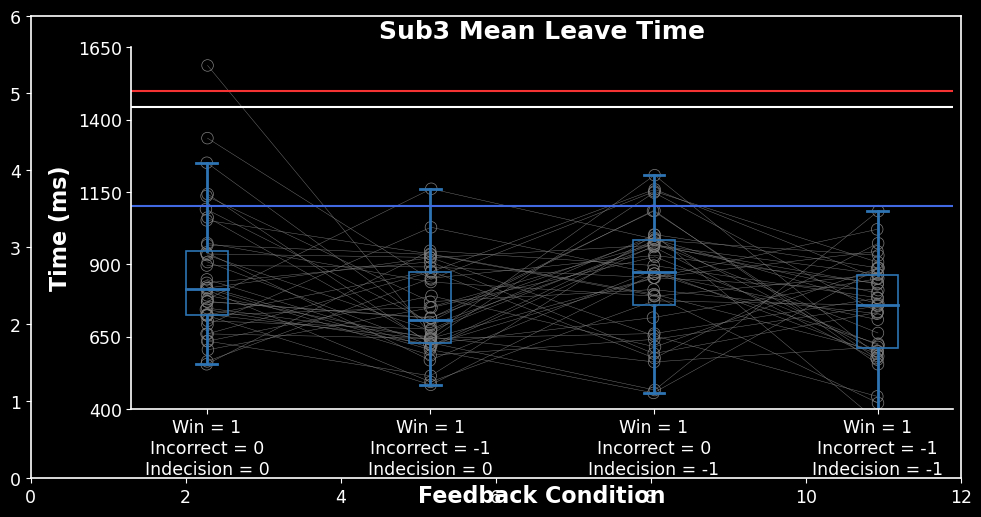

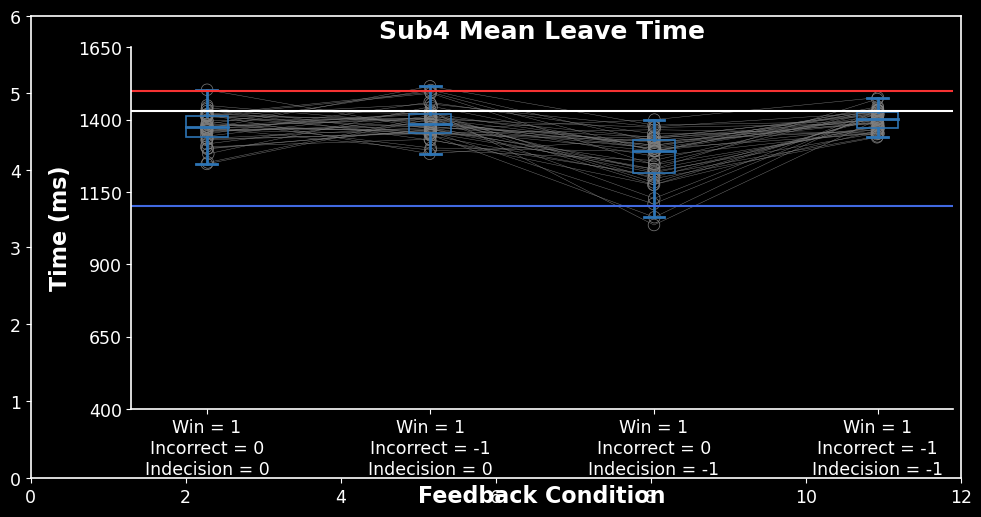

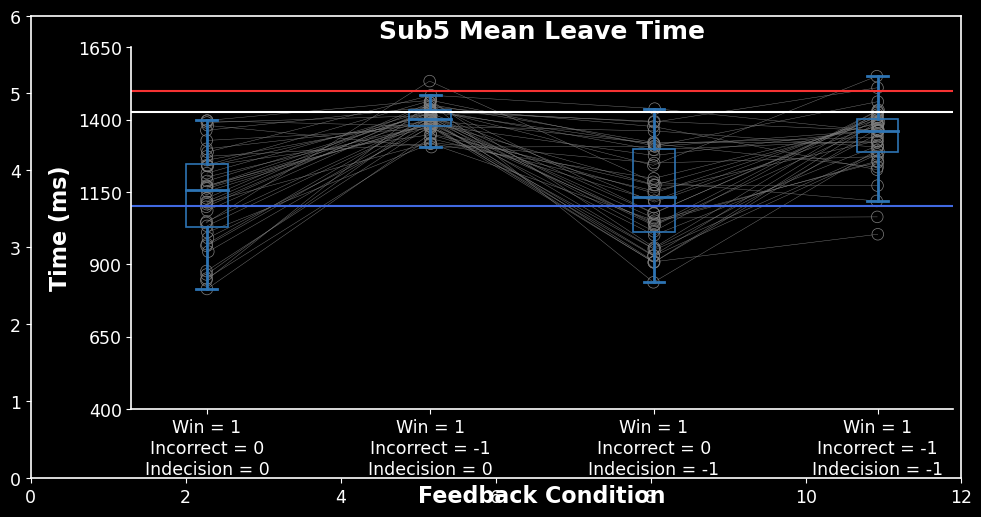

In [9]:
for i in range(num_subjects):
    metric = group.player_task_leave_time[i,:].T

    w,h = 12,6
    axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
    xlocs = np.linspace(0,w,num=len(trial_block_titles))
    ylocs = np.arange(400,1800,250)
    bw = 0.75
    pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
    dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=70)
    ax.axhline(y=1500,c=wheel.red)
    ax.axhline(y=1100,c=wheel.blue)
    ax.axhline(y=1100+np.nanmedian(group.react_reaction_time_only_react[i]))
    ax.set_xticks(xlocs),ax.set_yticks(ylocs)
    ax.set_xticklabels(trial_block_titles)
    ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

    ax.set_xlabel('Feedback Condition')
    ax.set_ylabel('Time (ms)')
    ax.set_title(f'Sub{i+1} Mean Leave Time')
    if save:
        axmain.set_axis_off()
        plt.savefig(SAVE_PATH+'mean_leave_time', dpi = 400, transparent = True)
    else:
        axmain.set_axis_on()
    plt.show()

In [10]:
group.player_minus_agent_task_leave_time[i,:].T

array([[ -98.84558105,  288.89355469, -158.60913086,  160.66516113],
       [ 258.3137207 ,  361.69250488,  259.18933105,   86.57800293],
       [ 173.61669922,  306.60131836,  273.49682617,  308.05615234],
       [-193.53027344,  302.62536621, -383.22302246,  173.72570801],
       [-141.71569824,  288.85546875,   52.56884766,  229.765625  ],
       [-110.82299805,  312.28259277, -216.03527832,  302.77416992],
       [-251.95361328,  292.82006836,   38.00256348,  209.62036133],
       [-124.76239014,  251.99694824, -142.49951172,  274.81524658],
       [-297.84899902,  290.90820312,   84.49487305,  121.52661133],
       [ 262.61804199,  349.7265625 ,  -80.11010742,  315.58862305],
       [ 250.46984863,  298.45141602,   21.28564453,  260.64660645],
       [ 237.93774414,  261.00646973,  229.34973145,  281.90783691],
       [ 159.54492188,  299.62329102,  -48.50183105,  284.95874023],
       [ 327.24316406,  285.82666016,  202.29418945,  286.3661499 ],
       [ -51.09191895,  336.493347

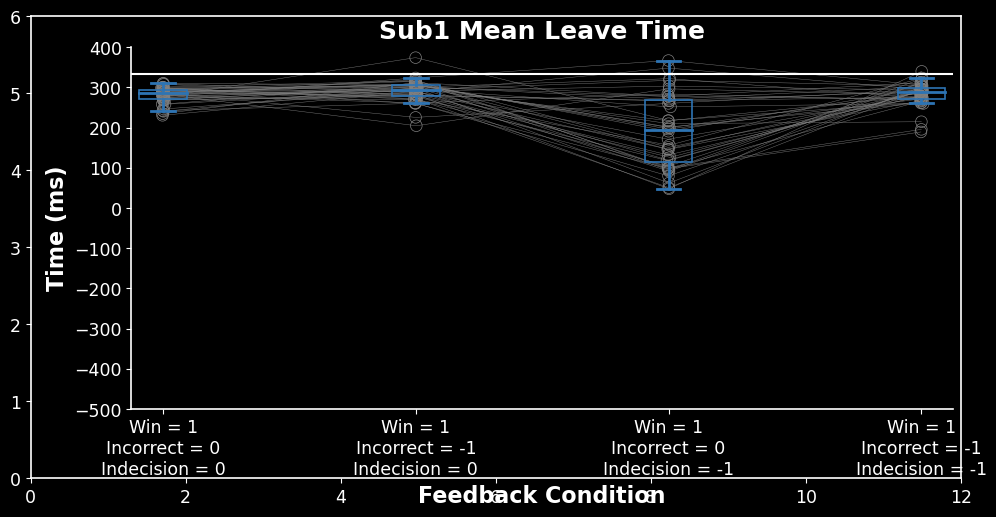

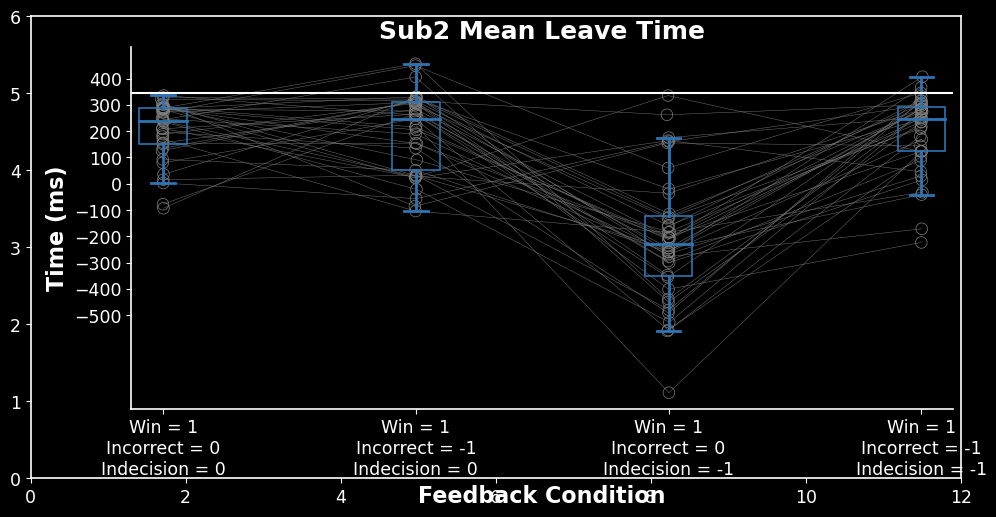

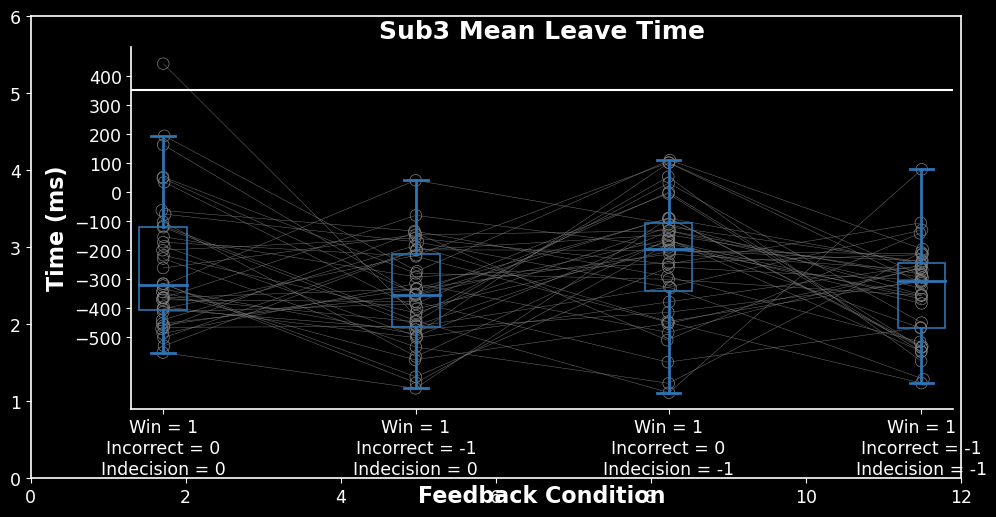

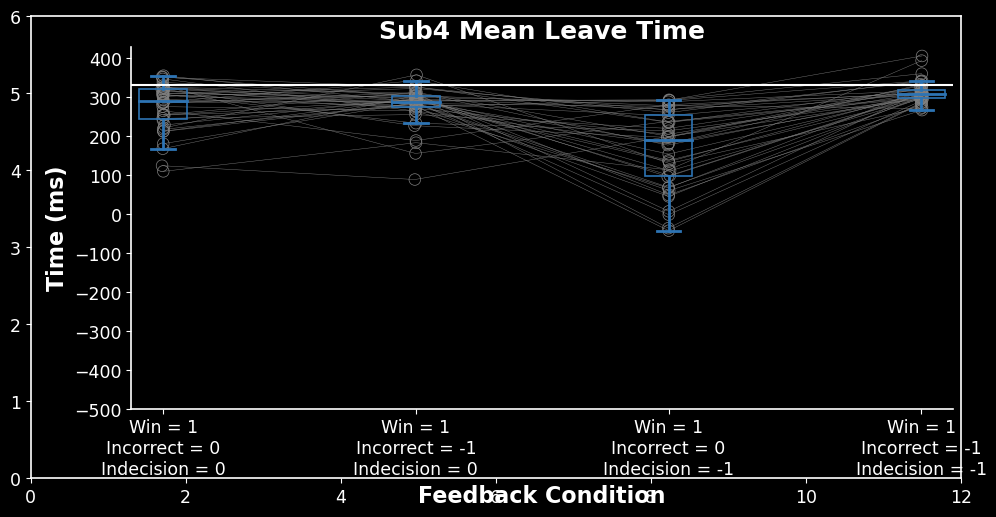

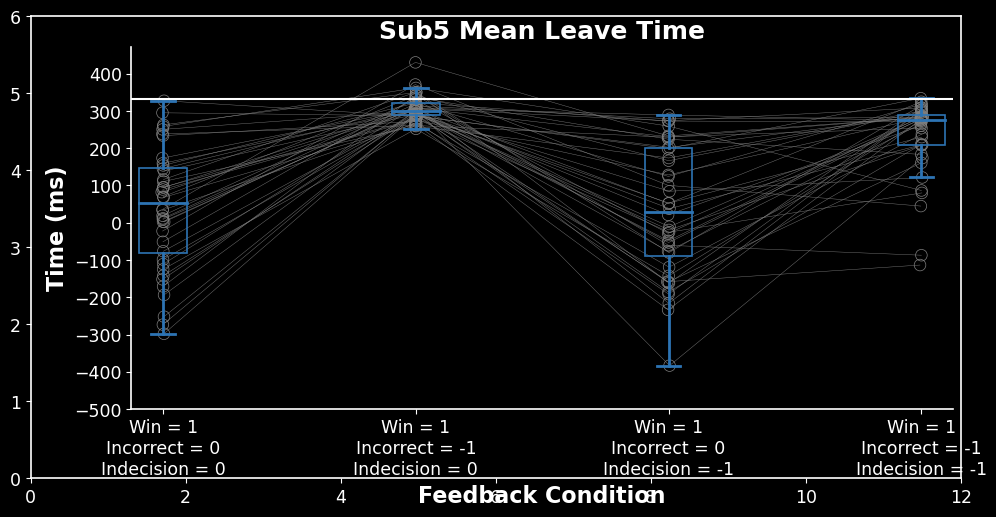

In [11]:
for i in range(num_subjects):
    metric = group.player_minus_agent_task_leave_time[i,:].T

    w,h = 12,6
    axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
    xlocs = np.linspace(0,w,num=len(trial_block_titles))
    ylocs = np.arange(-500,500,100)
    bw = 0.75
    pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
    dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=70)
    ax.axhline(y=np.nanmean(group.react_reaction_time_only_react[i]))
    ax.set_xticks(xlocs),ax.set_yticks(ylocs)
    ax.set_xticklabels(trial_block_titles)
    # ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

    ax.set_xlabel('Feedback Condition')
    ax.set_ylabel('Time (ms)')
    ax.set_title(f'Sub{i+1} Mean Leave Time')
    if save:
        axmain.set_axis_off()
        plt.savefig(SAVE_PATH+'mean_leave_time', dpi = 400, transparent = True)
    else:
        axmain.set_axis_on()
    plt.show()